# Usage Of The Python Aggregation Model - Explanation and Examples

##### Trivik Ragha

## Quick Introduction

This Python model was developed to computationally explore the Smoluchowski Coagulation Equation (SCE) in the context of marine particle aggregation. Detailed theoretical explanations of the SCE and the model can be found in the Master Notebook. However, to provide a brief overview, the SCE used in this model is given by:

$$\frac{dC(m,t)}{dt} = \frac{\alpha}{2} \int \limits_{0}^{m} \beta(m_j,m-m_j)C(m-m_j,t)C(m_j,t)dm_j 
-\alpha C(m,t) \int \limits_{0}^{\infty} \beta(m,m_j)C(m_j,t)dm_j -C(m,t) \frac{w_s(s)}{Z} \ (1).$$

The third term on the right hand side of the equation is an optional term in the model and can be toggled on or off. When toggled off, the equation the model solves becomes 

$$\frac{dC(m,t)}{dt} = \frac{\alpha}{2} \int \limits_{0}^{m} \beta(m_j,m-m_j)C(m-m_j,t)C(m_j,t)dm_j 
-\alpha C(m,t) \int \limits_{0}^{\infty} \beta(m,m_j)C(m_j,t)dm_jc \ (2) ,$$

which is simply a balance of gains and losses of number concentrations at different primary particle sizes.

The model uses Python's SciPy module to perform the numerical integration of the equations above. Note that the loss term (the second term on the right-hand side of Equations 1 and 2) is an indefinite integral. For practical purposes, the upper limit of the loss term is set to the size of the largest primary particle in the mass domain defined by the user.

## Overview of the Python Scripts: The Core Components of the Model

The model is composed of five Python (.py) scripts, each playing a crucial role in its functionality. Below is an explanation of each script:

1. Model_Parameter.py

   This script defines the main parameters of the model, which are organized into three primary categories. The first category relates to the control volume/sample of fluid and the flow regime parameters, such as the type of flow regime (laminar or turbulent). The second category focuses on the beta kernel parameters, including variables like fluid temperature and density. The third category pertains to the numerical solver, where parameters such as the time span for solving the SCE are specified. All global parameters are defined within this script and can be adjusted as needed.

2. Model_Functions.py

    This script contains the definitions of the coagulation kernel functions (beta kernels/encounter kernels), expressed in terms of mass using the equation for the volume of a sphere. The Master Notebook outlines the precise mathematical formulations and theoretical foundations for these functions. Additionally, this script includes functions to generate size ranges in terms of both diameters and masses, which are necessary for determining the mass domain required by the equation solver.

3. Model_Solver.py

    This script implements the algorithm that solves SCE. The core function within the script aims to compute the time rate of change of the particle size distribution, which is the main goal of the model. To solve the equation, the algorithm requires:

    - The mass domain and the initial distribution of particle number concentrations across that domain.

    - Parameters from Model_Parameter.py, such as whether to use a single kernel or a combination of all three, and whether the solution should be computed in a rectilinear or curvilinear coordinate system.

    When using all three kernels, the fluid shear kernel is selected based on the flow type (laminar shear for laminar flow and turbulent shear for turbulent flow), as defined in Model_Parameter.py. The function also takes as input the time span for the simulation, and the option to include the settling term (Equation 1) or not (Equation 2).

    These options are provided for convenience. For instance, if multiple simulations are to be run for comparison, it's easier to specify differing parameters without reloading Model_Parameter.py each time. The only exception occurs when changing the beta/encounter kernel parameters, in which case the user can either redefine them in the notebook or reload Model_Parameter.py after modifying the values.

    Given that the mass domain is defined as a discretized array, the algorithm uses an interpolator to estimate the particle concentration at any size within the domain. Since coagulation depends on particle interactions across a continuous range of sizes, the interpolator helps calculate coagulation rates more accurately by estimating concentrations at sizes between the defined bins.

4. Model_Plotting_Functions.py

    This script contains all the functions used to visualize data related to the Model. Notably, it includes an animation function that generates an animated plot showing how the PSD evolves over time, as well as a function that creates a static plot of the PSD at quarterly intervals. The script also defines additional functions related to the beta kernel functions, such as a heat map. Users can define and add other relevant functions as needed.

5. Numerical_SCE.py

    This is the final script for the model, which combines all the other scripts. To initialize and run the model in a notebook, the user simply needs to execute this script.


To use the model, the user only needs to edit the Model_Parameters.py script. However, to modify, build, or extend the model, the user can edit the relevant scripts as needed. For example, the user can add additional plotting functions to the Model_Plotting_Functions.py script.

The modular framework of the model provides the user with easy access and usability, allowing for convenient changes to the model.


## How To Use The Model

To use the model, first initialize it in the notebook. To do this, ensure that all the notebook and all python scripts are in the same directory. 
Then execute the Numerical_SCE.py as follows:

In [1]:
# Initialize the model.
%run Numerical_SCE.py

           Parameter      Value                                        Description
0      Sample_Volume         25  Size of the Sample Container in the LISST 200X...
1                mld        100       Mixed Layer Depth/Fluid Thickness, Units: cm
2               Flow  Turbulent               Flow Regime: 'Laminar' or 'Turbulent
3                K_B        0.0                     Boltzmann Constant, Units: J/K
4          T_Celcius         20                       Input Temperature in Celcius
5               T_th     293.15                Thermodynamic Temperature, Units: K
6              rho_f      1.025  Fluid Density, Units: g/cm^3, Note: Dependent ...
7              rho_p        1.2  Diatom/Cocolithospheres Particle Density, Unit...
8                 mu      0.001  Dynamic Viscosity, Units: kg/(m*s), Note: Depe...
9                 nu   0.000001  Kinematic Viscosity, Units: m^2/s, Note: Depen...
10             gamma          1                         Shear Gradient, Units: 1/s
11  

Note that all the parameters are output after running the script, making it easy for the user to view the parameter values directly in the notebook without needing to switch between the Model_Parameters.py script and the notebook.

The next step is to be familair with the function that solves the SCE. 

In [2]:
# Information about the the SCE function.
?SCE_Algorithm

Signature:
SCE_Algorithm(
    m_values,
    Initial_Concentrations,
    Kernel,
    Type,
    t_span,
    include_settling,
)
Docstring: Function to Solve the System of ODEs for Coagulation using the SCE Algorithm
File:      c:\users\trivi\onedrive\documents\rutgers\grad 24 - masters of operational oceanography\research thesis\python coding\trivik python model\model\current working model\model_solver.py
Type:      function

The SCE_Algorithm function requires six inputs to run successfully:

The first input, specified by m_values, pertains to the mass domain of the PSD.

The second input, Initial_Concentrations, pertains to the initial number concentrations (the PSD at time 
t=0s).

The third and fourth inputs, Kernel and Type, respectively, determine which beta kernels the user wants to use.

The fifth input, t_span, specifies the time span for the aggregation being investigated.

The final input, include_settling, is a binary value (True or False) that specifies whether Equation 1 or 2 should be used.

The output of this function is a pandas dataframe that contains the solution of the SCE given the specified inputs and model parameters.

## Example Usage

### Example 1

Say the user wants to simulate aggregation for an hour using the default parameters shown above and the sum of all curvilinear beta kernels. The user also wants to use Equation 1 so that the change is PSD is only specified by gains and losses without particle settling. The size ranges of the primary particle sizes are from 1 micrometer to 500 micrometers. The initial size distribution is constant across all size ranges and has a value of 1000 particles/cubic centimeter.

The first step is to create the mass domain - the first input of the SCE_Algorithm function. To do this, the user must define the particle size ranges of 1um to 500um. This is done as follows:

In [3]:
# Function used define the particle size ranges
?generate_diameters

Signature: generate_diameters(n, d_min, d_max, units)
Docstring: Generate n diameters between d_min and d_max
File:      c:\users\trivi\onedrive\documents\rutgers\grad 24 - masters of operational oceanography\research thesis\python coding\trivik python model\model\current working model\model_functions.py
Type:      function

In [4]:
#Function used to create the mass domain
?generate_mass_domain

Signature: generate_mass_domain(diameters)
Docstring: Generate n masses between d_min and d_max
File:      c:\users\trivi\onedrive\documents\rutgers\grad 24 - masters of operational oceanography\research thesis\python coding\trivik python model\model\current working model\model_functions.py
Type:      function

In [5]:
# Define the particle diameters.
diameters = generate_diameters(50, 1, 500, 'um') # 50 points between 1um and 500um. Units must be specified as the length dimension used by the model is cm.
# Generate the mass domain
masses = generate_mass_domain(diameters) # Units of mass used by the model is in grams.
#Print the diameters and masses.
print("**********************************************************************")
print(f"diameters: {diameters}")
print("**********************************************************************")
print(f"mass domain: {masses}")
print("**********************************************************************")

**********************************************************************
diameters: [0.0001     0.00111837 0.00213673 0.0031551  0.00417347 0.00519184
 0.0062102  0.00722857 0.00824694 0.00926531 0.01028367 0.01130204
 0.01232041 0.01333878 0.01435714 0.01537551 0.01639388 0.01741224
 0.01843061 0.01944898 0.02046735 0.02148571 0.02250408 0.02352245
 0.02454082 0.02555918 0.02657755 0.02759592 0.02861429 0.02963265
 0.03065102 0.03166939 0.03268776 0.03370612 0.03472449 0.03574286
 0.03676122 0.03777959 0.03879796 0.03981633 0.04083469 0.04185306
 0.04287143 0.0438898  0.04490816 0.04592653 0.0469449  0.04796327
 0.04898163 0.05      ]
**********************************************************************
mass domain: [6.28318531e-13 8.78887532e-10 6.12959349e-09 1.97342260e-08
 4.56742648e-08 8.79311897e-08 1.50486481e-07 2.37321617e-07
 3.52418079e-07 4.99757346e-07 6.83320899e-07 9.07090216e-07
 1.17504678e-06 1.49117206e-06 1.85944755e-06 2.28385473e-06
 2.76837507e-06 3.31699005e-06

Next, the user must define the initial concentrations - the second input into the SCE_Algorithm function.

In [6]:
# Define the initial number concentration of particles
ConstantInitialConcentration = np.ones_like(diameters) * 1000 # 1000 particles per cm^3 across the mass domain.
#Print the initial number concentration of particles
print("**********************************************************************")
print(f"Initial number concentration: {ConstantInitialConcentration}")
print("**********************************************************************")

**********************************************************************
Initial number concentration: [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000.]
**********************************************************************


It's always good to visualize the PSD at time t=0. 

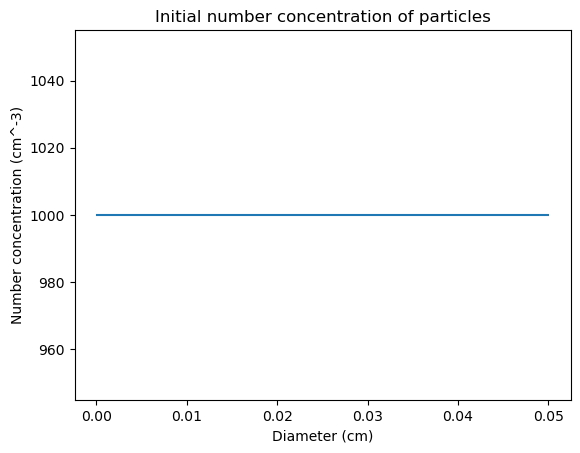

In [7]:
# Plot the initial number concentration of particles
plt.figure()
plt.plot(diameters, ConstantInitialConcentration)
plt.xlabel('Diameter (cm)')
plt.ylabel('Number concentration (cm^-3)')
plt.title('Initial number concentration of particles')
plt.show()

Given that we have the mass domain and intial psd, the SCE_Algorithm can now be executed.

In [8]:
# Define sol1_df as the dataframe that contains the solution to the model.
sol1_df = SCE_Algorithm(diameters, ConstantInitialConcentration, Kernel = 'all', Type = 'cur', t_span = (0,3600), include_settling = False) 
#Display the dataframe
sol1_df.head()

C:\Users\trivi\OneDrive\Documents\Rutgers\Grad 24 - Masters of Operational Oceanography\Research Thesis\Python Coding\Trivik Python Model\Model\Current Working Model\Model_Solver.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  gain_integral = integrate.quad(


,Number Concentration (1/cm3) at Mass 1.000e-04 g,Number Concentration (1/cm3) at Mass 1.118e-03 g,Number Concentration (1/cm3) at Mass 2.137e-03 g,Number Concentration (1/cm3) at Mass 3.155e-03 g,Number Concentration (1/cm3) at Mass 4.173e-03 g,Number Concentration (1/cm3) at Mass 5.192e-03 g,Number Concentration (1/cm3) at Mass 6.210e-03 g,Number Concentration (1/cm3) at Mass 7.229e-03 g,Number Concentration (1/cm3) at Mass 8.247e-03 g,Number Concentration (1/cm3) at Mass 9.265e-03 g,Number Concentration (1/cm3) at Mass 1.028e-02 g,Number Concentration (1/cm3) at Mass 1.130e-02 g,Number Concentration (1/cm3) at Mass 1.232e-02 g,Number Concentration (1/cm3) at Mass 1.334e-02 g,Number Concentration (1/cm3) at Mass 1.436e-02 g,Number Concentration (1/cm3) at Mass 1.538e-02 g,Number Concentration (1/cm3) at Mass 1.639e-02 g,Number Concentration (1/cm3) at Mass 1.741e-02 g,Number Concentration (1/cm3) at Mass 1.843e-02 g,Number Concentration (1/cm3) at Mass 1.945e-02 g,Number Concentration (1/cm3) at Mass 2.047e-02 g,Number Concentration (1/cm3) at Mass 2.149e-02 g,Number Concentration (1/cm3) at Mass 2.250e-02 g,Number Concentration (1/cm3) at Mass 2.352e-02 g,Number Concentration (1/cm3) at Mass 2.454e-02 g,Number Concentration (1/cm3) at Mass 2.556e-02 g,Number Concentration (1/cm3) at Mass 2.658e-02 g,Number Concentration (1/cm3) at Mass 2.760e-02 g,Number Concentration (1/cm3) at Mass 2.861e-02 g,Number Concentration (1/cm3) at Mass 2.963e-02 g,Number Concentration (1/cm3) at Mass 3.065e-02 g,Number Concentration (1/cm3) at Mass 3.167e-02 g,Number Concentration (1/cm3) at Mass 3.269e-02 g,Number Concentration (1/cm3) at Mass 3.371e-02 g,Number Concentration (1/cm3) at Mass 3.472e-02 g,Number Concentration (1/cm3) at Mass 3.574e-02 g,Number Concentration (1/cm3) at Mass 3.676e-02 g,Number Concentration (1/cm3) at Mass 3.778e-02 g,Number Concentration (1/cm3) at Mass 3.880e-02 g,Number Concentration (1/cm3) at Mass 3.982e-02 g,Number Concentration (1/cm3) at Mass 4.083e-02 g,Number Concentration (1/cm3) at Mass 4.185e-02 g,Number Concentration (1/cm3) at Mass 4.287e-02 g,Number Concentration (1/cm3) at Mass 4.389e-02 g,Number Concentration (1/cm3) at Mass 4.491e-02 g,Number Concentration (1/cm3) at Mass 4.593e-02 g,Number Concentration (1/cm3) at Mass 4.694e-02 g,Number Concentration (1/cm3) at Mass 4.796e-02 g,Number Concentration (1/cm3) at Mass 4.898e-02 g,Number Concentration (1/cm3) at Mass 5.000e-02 g
Time (s),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
0.000076,999.865537,999.272612,998.849075,998.494328,998.187786,997.919932,997.685130,997.479577,997.300486,997.145704,997.013500,996.902438,996.811302,996.739042,996.684740,996.647579,996.626831,996.621835,996.631992,996.656751,996.695607,996.748090,996.813764,996.892224,996.983086,997.085994,997.200608,997.326611,997.463699,997.611586,997.769998,997.938674,998.117366,998.305836,998.503855,998.711206,998.927676,999.153066,999.387179,999.629827,999.880829,1000.140011,1000.407202,1000.682237,1000.964959,1001.255212,1001.552848,1001.857719,1002.169685,1002.488609
0.000152,999.731288,998.546813,997.701135,996.993070,996.381404,995.847069,995.378764,994.968859,994.611765,994.303164,994.039580,993.818137,993.636398,993.492261,993.383888,993.309648,993.268086,993.257885,993.277850,993.326888,993.403993,993.508235,993.638751,993.794735,993.975435,994.180145,994.408201,994.658

Now that the solution set has been obtained, the next step is to visualize the changing particle size distribution.

In [9]:
#Function that plots the quartiles(static plot)
?plot_quartile_data

Signature: plot_quartile_data(sol_df, diameters, logscalex=False)
Docstring: Function to plot the quartile data of the number concentration of particles over time
File:      c:\users\trivi\onedrive\documents\rutgers\grad 24 - masters of operational oceanography\research thesis\python coding\trivik python model\model\current working model\model_plotting_functions.py
Type:      function

In [10]:
# Function that plots the solution of the model as an animation.
?AnimatedPSD

Signature: AnimatedPSD(sol_df, diameters, logscalex=False)
Docstring: Function to generate an animated plot of the number concentration of particles over time
File:      c:\users\trivi\onedrive\documents\rutgers\grad 24 - masters of operational oceanography\research thesis\python coding\trivik python model\model\current working model\model_plotting_functions.py
Type:      function

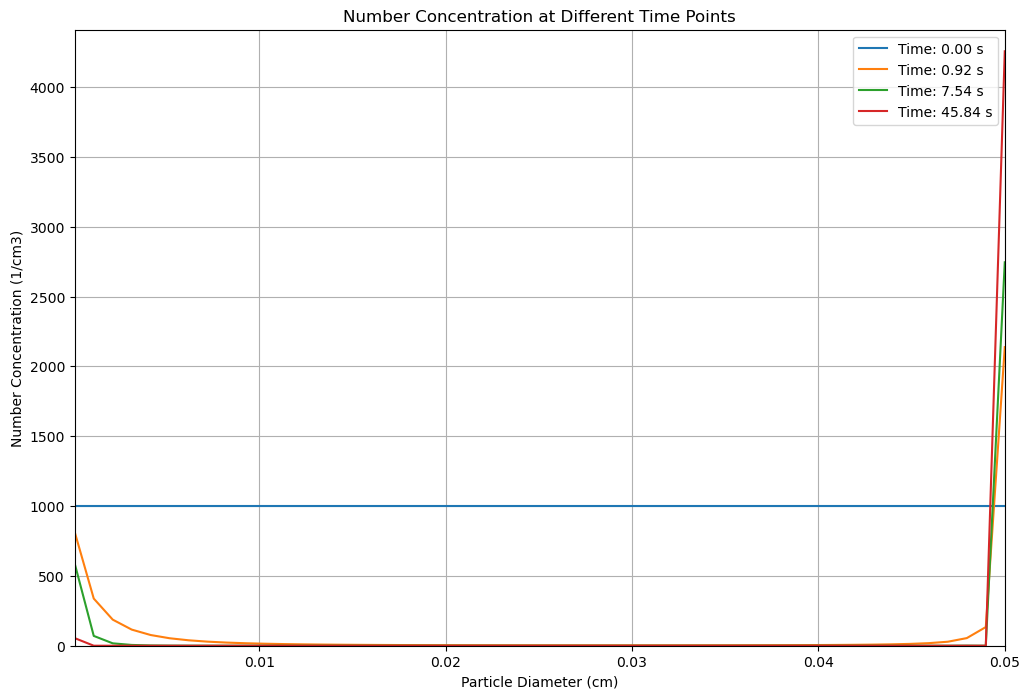

In [11]:
plot_quartile_data(sol1_df, diameters, masses)

In [12]:
AnimatedPSD(sol1_df, diameters, logscalex= False)

### Example 2.

For this example, suppose the user wants to simulate aggregation for a day with the same parameters as in Example 1, but using the sum of all rectilinear beta kernels. Also suppose that the user provides the same mass domain but uses a an initial concentration array of zeros everywhere except for the middle value of the mass domain - which has a number concentration of 1000 particles/cubic centimeter. Then proceed as follows:

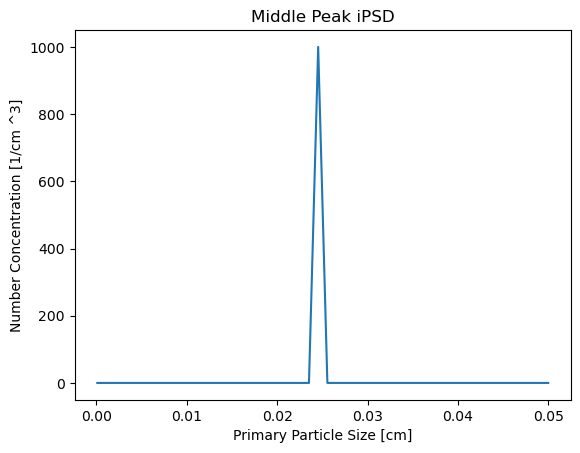

In [13]:
# Particle Size Distribution With Zeros everywhere except the middle primary particle size
Middle_Peak_1000_iPSD = np.zeros(len(masses))

# Set the middle primary particle size to 1000
Middle_Peak_1000_iPSD[24] = 1000

# Plot the iPSD to see the distribution
plt.figure()
plt.plot(diameters, Middle_Peak_1000_iPSD)
plt.xlabel('Primary Particle Size [cm]')
plt.ylabel('Number Concentration [1/cm ^3]')
plt.title('Middle Peak iPSD')
plt.show()

In [14]:
a1_Middle_Peak_10000_sol_df = SCE_Algorithm(masses, Middle_Peak_1000_iPSD, Kernel = 'all' , Type = 'rec',t_span = (0,3600*24),include_settling = False)
a1_Middle_Peak_10000_sol_df.head()

,Number Concentration (1/cm3) at Mass 6.283e-13 g,Number Concentration (1/cm3) at Mass 8.789e-10 g,Number Concentration (1/cm3) at Mass 6.130e-09 g,Number Concentration (1/cm3) at Mass 1.973e-08 g,Number Concentration (1/cm3) at Mass 4.567e-08 g,Number Concentration (1/cm3) at Mass 8.793e-08 g,Number Concentration (1/cm3) at Mass 1.505e-07 g,Number Concentration (1/cm3) at Mass 2.373e-07 g,Number Concentration (1/cm3) at Mass 3.524e-07 g,Number Concentration (1/cm3) at Mass 4.998e-07 g,Number Concentration (1/cm3) at Mass 6.833e-07 g,Number Concentration (1/cm3) at Mass 9.071e-07 g,Number Concentration (1/cm3) at Mass 1.175e-06 g,Number Concentration (1/cm3) at Mass 1.491e-06 g,Number Concentration (1/cm3) at Mass 1.859e-06 g,Number Concentration (1/cm3) at Mass 2.284e-06 g,Number Concentration (1/cm3) at Mass 2.768e-06 g,Number Concentration (1/cm3) at Mass 3.317e-06 g,Number Concentration (1/cm3) at Mass 3.934e-06 g,Number Concentration (1/cm3) at Mass 4.622e-06 g,Number Concentration (1/cm3) at Mass 5.387e-06 g,Number Concentration (1/cm3) at Mass 6.232e-06 g,Number Concentration (1/cm3) at Mass 7.161e-06 g,Number Concentration (1/cm3) at Mass 8.178e-06 g,Number Concentration (1/cm3) at Mass 9.286e-06 g,Number Concentration (1/cm3) at Mass 1.049e-05 g,Number Concentration (1/cm3) at Mass 1.180e-05 g,Number Concentration (1/cm3) at Mass 1.320e-05 g,Number Concentration (1/cm3) at Mass 1.472e-05 g,Number Concentration (1/cm3) at Mass 1.635e-05 g,Number Concentration (1/cm3) at Mass 1.809e-05 g,Number Concentration (1/cm3) at Mass 1.996e-05 g,Number Concentration (1/cm3) at Mass 2.194e-05 g,Number Concentration (1/cm3) at Mass 2.406e-05 g,Number Concentration (1/cm3) at Mass 2.631e-05 g,Number Concentration (1/cm3) at Mass 2.869e-05 g,Number Concentration (1/cm3) at Mass 3.121e-05 g,Number Concentration (1/cm3) at Mass 3.388e-05 g,Number Concentration (1/cm3) at Mass 3.669e-05 g,Number Concentration (1/cm3) at Mass 3.966e-05 g,Number Concentration (1/cm3) at Mass 4.278e-05 g,Number Concentration (1/cm3) at Mass 4.606e-05 g,Number Concentration (1/cm3) at Mass 4.951e-05 g,Number Concentration (1/cm3) at Mass 5.312e-05 g,Number Concentration (1/cm3) at Mass 5.691e-05 g,Number Concentration (1/cm3) at Mass 6.087e-05 g,Number Concentration (1/cm3) at Mass 6.500e-05 g,Number Concentration (1/cm3) at Mass 6.933e-05 g,Number Concentration (1/cm3) at Mass 7.384e-05 g,Number Concentration (1/cm3) at Mass 7.854e-05 g
Time (s),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
0.017651,3.331049e-61,9.923178e-37,0.0,9.636099e-43,0.0,2.126051e-35,0.0,1.794160e-33,3.541965e-32,0.0,0.0,1.715856e-28,4.931478e-27,0.0,0.0,0.0,5.974050e-22,8.726245e-21,0.0,0.0,0.0,5.684534e-16,4.732297e-15,0.0,999.999993,2.860082e-12,2.508951e-10,1.173044e-09,0.0,0.0,0.000004,0.0,6.843571e-07,0.0,0.0,1.136515e-08,1.944443e-10,0.0,1.478993e-10,0.0,6.412450e-13,0.0,0.0,3.493148e-13,0.0,2.137607e-15,0.0,1.725115e-15,0.0,0.0
0.035303,6.662097e-61,1.441873e-36,0.0,1.927220e-42,0.0,2.453287e-35,0.0,2.292763e-33,7.629753e-32,0.0,0.0,3.388864e-28,9.821004e-27,0.0,0.0,0.0,1.194810e-21,1.745248e-20,0.0,0.0,0.0,1.136907e-15,9.464593e-15,0.0,999.999986,5.720165e-12,5.017902e-10,2.346088e-09,0.0,0.0,0.000008,0.0,1.368714e-06,0.0,0.0,2.273034e-08,3.889160e-10,0.0,2.958006e-10,0.0,1.282455e-12,0.0,0.0,6.986357e-13,0.0,4.275285e-15,0.0,3.450250e-15,0.0,0.0
0.211817,3.997258e-60,7.520905e-36,0.0,1.156332e-41,0.0,2.917365e-35,0.0,0.000000e+00,4.935976e-31,0.0,0.0,2.005205e-27,5.907029e-26,0.0,0.0,0.0,7.168859e-21,1.047147e-19,0.0,0.0,0.0,6.821439e-15,5.678755e

In [15]:
AnimatedPSD(a1_Middle_Peak_10000_sol_df, diameters, logscalex= False)

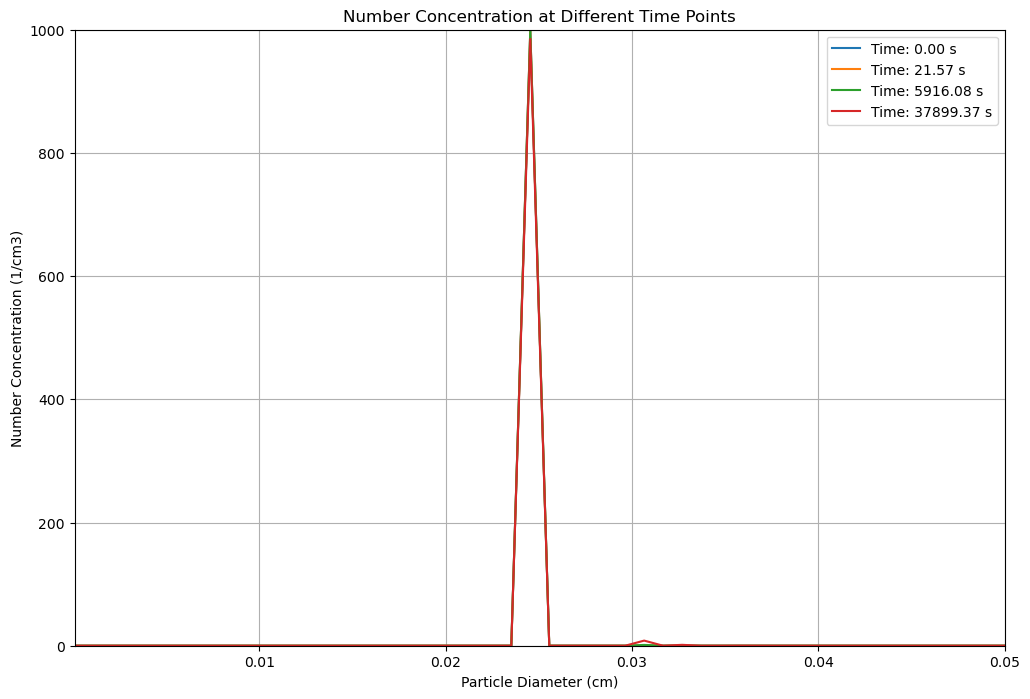

In [16]:
plot_quartile_data(a1_Middle_Peak_10000_sol_df, diameters, masses)

Now suppose the user wants to change the value of stickiness (alpha) to 0.5 and the turbulent energy dissipation rate (epsilon) to a value of 1m^2/s^3. The user can either change these values in the Model_Parameters.py script (which requires the script to be run again) or redifeine them in the notebook.

In [17]:
#First, print out the values of alpha and epsilon as defined in the Model_Parameters.py file
print(f" old alpha: {alpha}")
print(f" old epsilon: {epsilon}")
#Next, Redifine the values of alpha and epsilon
alpha = 0.5
epsilon = 1
#Then, confirm the new values of alpha and epsilon have been updated.
print(f" new alpha: {alpha}")
print(f" new epsilon: {epsilon}")

 old alpha: 1
 old epsilon: 0.001
 new alpha: 0.5
 new epsilon: 1


In [18]:
#run the aggregation model with the new values of alpha and epsilon
a1_Middle_Peak_10000_sol_df1 = SCE_Algorithm(masses, Middle_Peak_1000_iPSD, Kernel = 'all' , Type = 'rec',t_span = (0,3600*24),include_settling = False)
a1_Middle_Peak_10000_sol_df1.head()

,Number Concentration (1/cm3) at Mass 6.283e-13 g,Number Concentration (1/cm3) at Mass 8.789e-10 g,Number Concentration (1/cm3) at Mass 6.130e-09 g,Number Concentration (1/cm3) at Mass 1.973e-08 g,Number Concentration (1/cm3) at Mass 4.567e-08 g,Number Concentration (1/cm3) at Mass 8.793e-08 g,Number Concentration (1/cm3) at Mass 1.505e-07 g,Number Concentration (1/cm3) at Mass 2.373e-07 g,Number Concentration (1/cm3) at Mass 3.524e-07 g,Number Concentration (1/cm3) at Mass 4.998e-07 g,Number Concentration (1/cm3) at Mass 6.833e-07 g,Number Concentration (1/cm3) at Mass 9.071e-07 g,Number Concentration (1/cm3) at Mass 1.175e-06 g,Number Concentration (1/cm3) at Mass 1.491e-06 g,Number Concentration (1/cm3) at Mass 1.859e-06 g,Number Concentration (1/cm3) at Mass 2.284e-06 g,Number Concentration (1/cm3) at Mass 2.768e-06 g,Number Concentration (1/cm3) at Mass 3.317e-06 g,Number Concentration (1/cm3) at Mass 3.934e-06 g,Number Concentration (1/cm3) at Mass 4.622e-06 g,Number Concentration (1/cm3) at Mass 5.387e-06 g,Number Concentration (1/cm3) at Mass 6.232e-06 g,Number Concentration (1/cm3) at Mass 7.161e-06 g,Number Concentration (1/cm3) at Mass 8.178e-06 g,Number Concentration (1/cm3) at Mass 9.286e-06 g,Number Concentration (1/cm3) at Mass 1.049e-05 g,Number Concentration (1/cm3) at Mass 1.180e-05 g,Number Concentration (1/cm3) at Mass 1.320e-05 g,Number Concentration (1/cm3) at Mass 1.472e-05 g,Number Concentration (1/cm3) at Mass 1.635e-05 g,Number Concentration (1/cm3) at Mass 1.809e-05 g,Number Concentration (1/cm3) at Mass 1.996e-05 g,Number Concentration (1/cm3) at Mass 2.194e-05 g,Number Concentration (1/cm3) at Mass 2.406e-05 g,Number Concentration (1/cm3) at Mass 2.631e-05 g,Number Concentration (1/cm3) at Mass 2.869e-05 g,Number Concentration (1/cm3) at Mass 3.121e-05 g,Number Concentration (1/cm3) at Mass 3.388e-05 g,Number Concentration (1/cm3) at Mass 3.669e-05 g,Number Concentration (1/cm3) at Mass 3.966e-05 g,Number Concentration (1/cm3) at Mass 4.278e-05 g,Number Concentration (1/cm3) at Mass 4.606e-05 g,Number Concentration (1/cm3) at Mass 4.951e-05 g,Number Concentration (1/cm3) at Mass 5.312e-05 g,Number Concentration (1/cm3) at Mass 5.691e-05 g,Number Concentration (1/cm3) at Mass 6.087e-05 g,Number Concentration (1/cm3) at Mass 6.500e-05 g,Number Concentration (1/cm3) at Mass 6.933e-05 g,Number Concentration (1/cm3) at Mass 7.384e-05 g,Number Concentration (1/cm3) at Mass 7.854e-05 g
Time (s),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
0.017651,3.331049e-61,9.923178e-37,0.0,9.636099e-43,0.0,2.126051e-35,0.0,1.794160e-33,3.541965e-32,0.0,0.0,1.715856e-28,4.931478e-27,0.0,0.0,0.0,5.974050e-22,8.726245e-21,0.0,0.0,0.0,5.684534e-16,4.732297e-15,0.0,999.999993,2.860082e-12,2.508951e-10,1.173044e-09,0.0,0.0,0.000004,0.0,6.843571e-07,0.0,0.0,1.136515e-08,1.944443e-10,0.0,1.478993e-10,0.0,6.412450e-13,0.0,0.0,3.493148e-13,0.0,2.137607e-15,0.0,1.725115e-15,0.0,0.0
0.035303,6.662097e-61,1.441873e-36,0.0,1.927220e-42,0.0,2.453287e-35,0.0,2.292763e-33,7.629753e-32,0.0,0.0,3.388864e-28,9.821004e-27,0.0,0.0,0.0,1.194810e-21,1.745248e-20,0.0,0.0,0.0,1.136907e-15,9.464593e-15,0.0,999.999986,5.720165e-12,5.017902e-10,2.346088e-09,0.0,0.0,0.000008,0.0,1.368714e-06,0.0,0.0,2.273034e-08,3.889160e-10,0.0,2.958006e-10,0.0,1.282455e-12,0.0,0.0,6.986357e-13,0.0,4.275285e-15,0.0,3.450250e-15,0.0,0.0
0.211817,3.997258e-60,7.520905e-36,0.0,1.156332e-41,0.0,2.917365e-35,0.0,0.000000e+00,4.935976e-31,0.0,0.0,2.005205e-27,5.907029e-26,0.0,0.0,0.0,7.168859e-21,1.047147e-19,0.0,0.0,0.0,6.821439e-15,5.678755e

In [19]:
AnimatedPSD(a1_Middle_Peak_10000_sol_df1, diameters, logscalex= False)

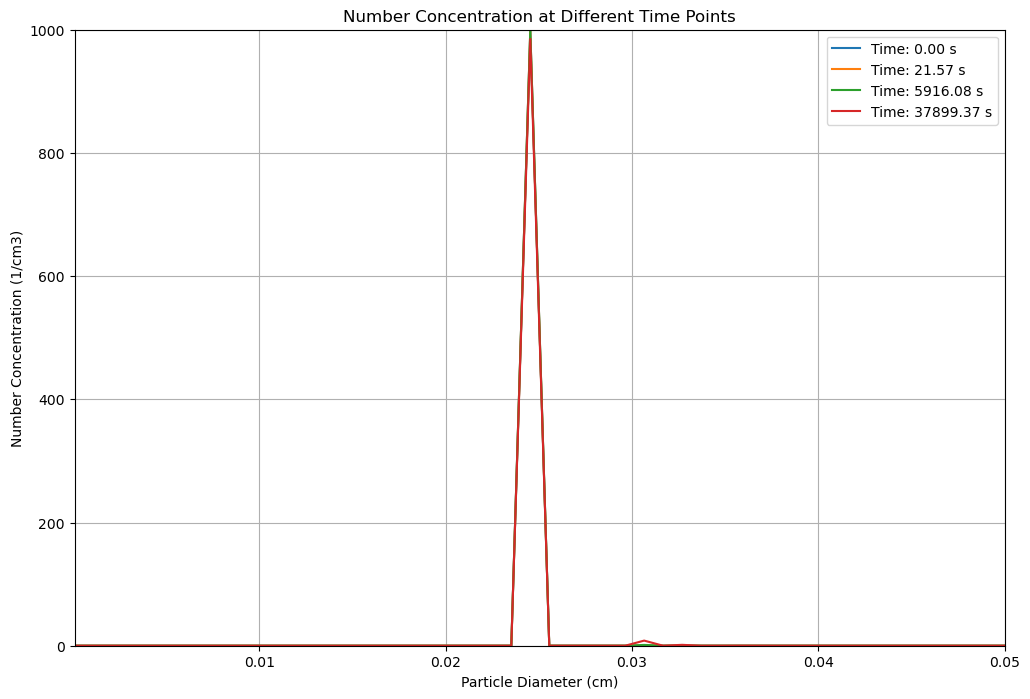

In [20]:
plot_quartile_data(a1_Middle_Peak_10000_sol_df1, diameters, masses)

## Addtional Notes

This Python model was developed as a tool to understand the Smoluchowski Coagulation Equation (SCE) and serves as an introductory approach to computationally solving the equation. It is designed for beginners, much like I was when I first undertook this project as part of my Master's Thesis in the Masters of Operational Oceanography program at Rutgers University, New Brunswick, New Jersey. Given the marine science context of the thesis, the model focuses on investigating marine particle aggregation.

While the model has several assumptions and limitations, it is not a definitive solution for modeling marine particle aggregation. Instead, it provides a foundational framework that can be further refined and developed to better capture the complexities of marine particle aggregation. For example, the algorithm used to solve the SCE is relatively simple. More sophisticated methods exist that can better integrate the SCE, addressing the discrete nature of numerical modeling while bridging the gap to the continuous nature of the equation.

Despite these limitations, the model effectively demonstrates how the particle size distribution changes over time, showing expected trends such as an increase in number concentration at the larger end of the mass domain. It also highlights the slower progression of aggregation when using curvilinear kernels compared to rectilinear kernels. Users can adjust various parameters and run the model to explore how these changes affect the rate of aggregation. Because the solution is stored in a dataframe, users can perform various numerical and statistical analyses, offering a basic understanding of how aggregation behaves under the SCE.

Happy Exploring!